# **AdaBoost_IBM**

## **Importing Libraries and Dataset**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, roc_auc_score, precision_recall_curve, average_precision_score

In [2]:
# Read the CSV dataset using pandas

data = pd.read_csv('preprocessed_data_IBM.csv')
data.info()

# Select the features and target variable

X_train = data.drop(columns=['Churn'])
y_train = data['Churn']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   int64  
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   int64  
 3   Dependents        7032 non-null   int64  
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   int64  
 6   MultipleLines     7032 non-null   int64  
 7   InternetService   7032 non-null   int64  
 8   OnlineSecurity    7032 non-null   int64  
 9   OnlineBackup      7032 non-null   int64  
 10  DeviceProtection  7032 non-null   int64  
 11  TechSupport       7032 non-null   int64  
 12  StreamingTV       7032 non-null   int64  
 13  StreamingMovies   7032 non-null   int64  
 14  Contract          7032 non-null   int64  
 15  PaperlessBilling  7032 non-null   int64  
 16  PaymentMethod     7032 non-null   int64  


## **Model Training**

In [3]:
# Defining the function to calculate evaluation metrics

def calculate_metrics(y_true, y_pred, conf_matrix):
    tn, fp, _, _ = conf_matrix.ravel()

    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    specificity = tn / (tn + fp)
    f1 = f1_score(y_true, y_pred)

    metrics = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "Specificity": specificity,
        "F1-score": f1
    }

    return metrics

# Defining the function to display evaluation metrics

def display_metrics(metrics):
    for metric_name, metric_value in metrics.items():
        print(f"{metric_name.ljust(12)}: {metric_value * 100:.2f}%")

In [4]:
# Split the data into two sets: Training (70%), Test (30%)

X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.3, random_state=42)

# Load the ML/DL model

clf = AdaBoostClassifier(random_state=42)

# Fit the training set into the model

clf.fit(X_train, y_train)

# Predict the customer churn

y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

### **Classification Report**

In [5]:
# Calculate the accuracy of the model

accuracy_train = accuracy_score(y_train, y_train_pred)
print(f"Accuracy on training set: {accuracy_train * 100:.2f}%\n")

# Display the full classification report

print(classification_report(y_train, y_train_pred))

Accuracy on training set: 81.23%

              precision    recall  f1-score   support

           0       0.85      0.90      0.88      3614
           1       0.67      0.57      0.62      1308

    accuracy                           0.81      4922
   macro avg       0.76      0.73      0.75      4922
weighted avg       0.80      0.81      0.81      4922



### **Confusion Matrix**

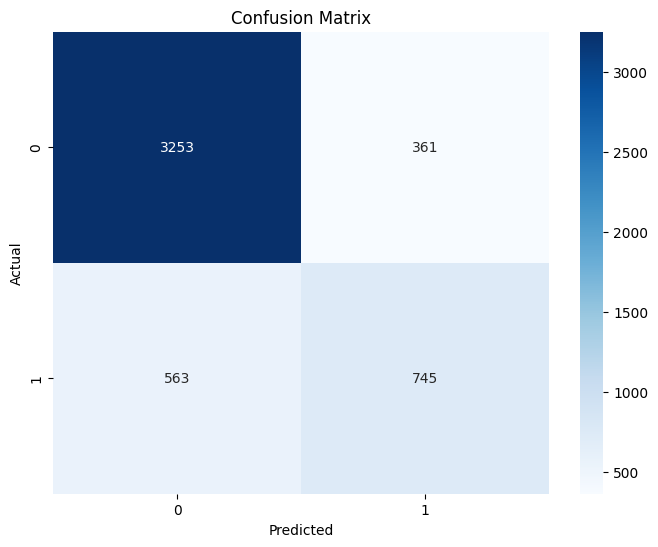

Accuracy    : 81.23%
Precision   : 67.36%
Recall      : 56.96%
Specificity : 90.01%
F1-score    : 61.72%


In [6]:
# Display the confusion matrix

conf_matrix_train = confusion_matrix(y_train, y_train_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_train, annot=True, fmt='d', cmap='Blues',
            xticklabels=clf.classes_, yticklabels=clf.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

metrics_train = calculate_metrics(y_train, y_train_pred, conf_matrix_train)
display_metrics(metrics_train)

## **Model Testing**

### **Classification Report**

In [7]:
# Calculate the accuracy of the model

accuracy_test = accuracy_score(y_test, y_test_pred)
print(f"Accuracy on testing set: {accuracy_test * 100:.2f}%\n")

# Display the full classification report

print(classification_report(y_test, y_test_pred))

Accuracy on testing set: 79.38%

              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1549
           1       0.63      0.53      0.58       561

    accuracy                           0.79      2110
   macro avg       0.74      0.71      0.72      2110
weighted avg       0.78      0.79      0.79      2110



### **Confusion Matrix**

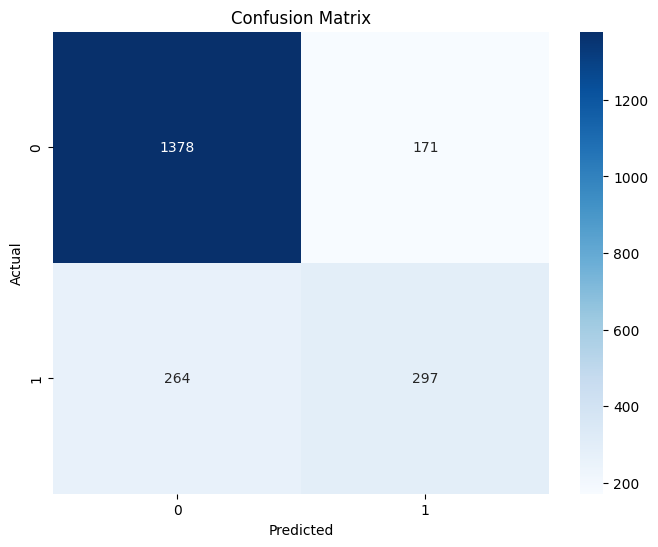

Accuracy    : 79.38%
Precision   : 63.46%
Recall      : 52.94%
Specificity : 88.96%
F1-score    : 57.73%


In [8]:
# Display the confusion matrix

conf_matrix_test = confusion_matrix(y_test, y_test_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_test, annot=True, fmt='d', cmap='Blues',
            xticklabels=clf.classes_, yticklabels=clf.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

metrics_test = calculate_metrics(y_test, y_test_pred, conf_matrix_test)
display_metrics(metrics_test)

## **Model Enhancement**

In [9]:
# Tune the parameters of the model and find the best model using Grid Search

def tune_model(model, X_train, y_train, param_grid, scoring='accuracy', cv=5):
    gridSearch = GridSearchCV(estimator=model, param_grid=param_grid,
                               scoring=scoring, cv=cv)

    gridSearch.fit(X_train, y_train)

    bestParameters = gridSearch.best_params_
    bestScore = gridSearch.best_score_

    print(f"Best parameters: {bestParameters}\n")
    print(f"Best {scoring} score: {bestScore}")

    bestModel = gridSearch.best_estimator_
    return bestModel

# Validate the model performance using cross validation method with num of folds = 5

def cross_validation(model, X_train, y_train, scoring='accuracy', cv=5):
    result = cross_val_score(model, X_train, y_train, scoring=scoring, cv=cv)

    print(f"\nCross Validation Scores ({scoring}): {result}")
    print(f"\nMean Accuracy      : {result.mean() * 100:.2f}%")
    print(f"Standard Deviation : {result.std():.2f}")

### **Hyperparameter Tuning**

In [10]:
# Define the parameters for tuning

clf_param = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [1.0, 5.0, 10.0, 15.0]}

# Tune the model

clf_tuned = tune_model(clf, X_train, y_train, clf_param, 'accuracy', cv=5)

# Predict customer churn using the tuned model

y_train_pred = clf_tuned.predict(X_train)

Best parameters: {'learning_rate': 1.0, 'n_estimators': 50}

Best accuracy score: 0.8017087615038587


### **Classification Report**

In [11]:
# Calculate the accuracy of the model

accuracy_train = accuracy_score(y_train, y_train_pred)
print(f"Accuracy on training set: {accuracy_train * 100:.2f}%\n")

# Display the full classification report

print(classification_report(y_train, y_train_pred))

Accuracy on training set: 81.23%

              precision    recall  f1-score   support

           0       0.85      0.90      0.88      3614
           1       0.67      0.57      0.62      1308

    accuracy                           0.81      4922
   macro avg       0.76      0.73      0.75      4922
weighted avg       0.80      0.81      0.81      4922



### **Cross-Validation Score**

In [12]:
# Validate the model performance

cross_validation(clf_tuned, X_train, y_train, scoring='accuracy', cv=5)


Cross Validation Scores (accuracy): [0.80203046 0.79086294 0.80182927 0.79776423 0.81605691]

Mean Accuracy      : 80.17%
Standard Deviation : 0.01


## **Final Evaluation**

In [13]:
# Predict the customer churn for test set using tuned model

y_test_pred = clf_tuned.predict(X_test)
y_test_pred_proba = clf_tuned.predict_proba(X_test)[:, 1]

### **Classification Report**

In [14]:
# Calculate the accuracy of the model

accuracy_test = accuracy_score(y_test, y_test_pred)
print(f"Accuracy on test set: {accuracy_test * 100:.2f}%\n")

# Display the full classification report

print(classification_report(y_test, y_test_pred))

Accuracy on test set: 79.38%

              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1549
           1       0.63      0.53      0.58       561

    accuracy                           0.79      2110
   macro avg       0.74      0.71      0.72      2110
weighted avg       0.78      0.79      0.79      2110



### **Confusion Matrix**

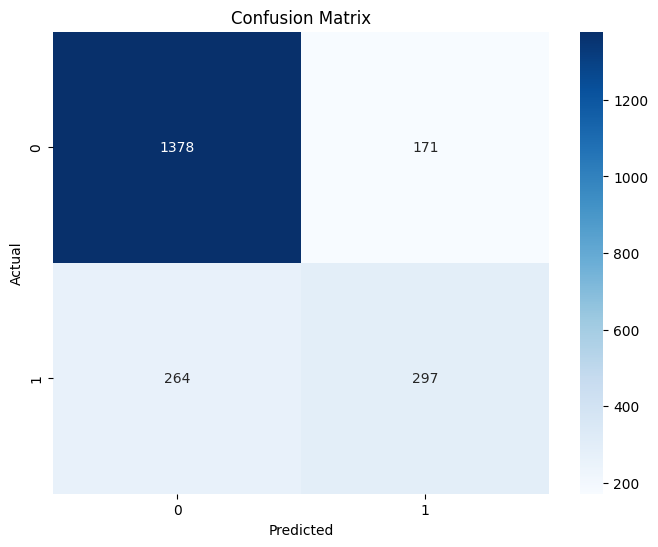

Accuracy    : 79.38%
Precision   : 63.46%
Recall      : 52.94%
Specificity : 88.96%
F1-score    : 57.73%


In [15]:
# Display the confusion matrix

conf_matrix_test = confusion_matrix(y_test, y_test_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_test, annot=True, fmt='d', cmap='Blues',
            xticklabels=clf_tuned.classes_, yticklabels=clf_tuned.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

metrics_test = calculate_metrics(y_test, y_test_pred, conf_matrix_test)
display_metrics(metrics_test)

### **Receiver Operating Characteristic (ROC) Curve**

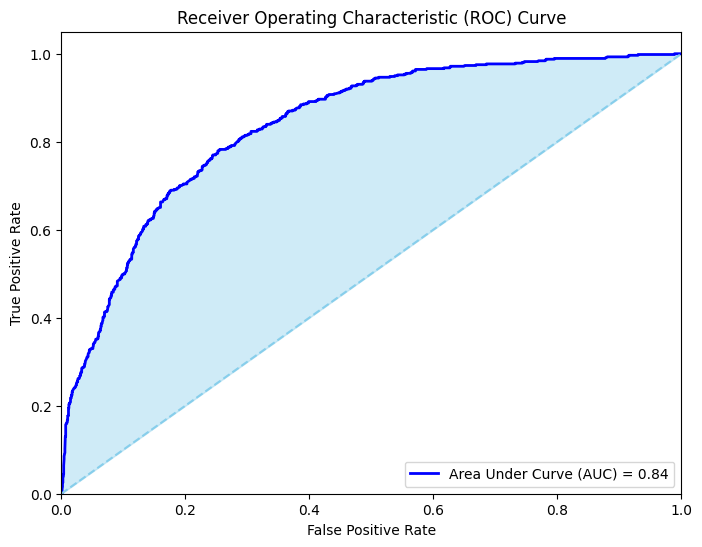

In [16]:
# Calculate the FPR, TPR, and AUC score
fpr, tpr, _ = roc_curve(y_test, y_test_pred_proba)
auc_score = roc_auc_score(y_test, y_test_pred_proba)

# Plot the ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'Area Under Curve (AUC) = {auc_score:.2f}')
plt.fill_between(fpr, tpr, fpr, color='skyblue', alpha=0.4)
plt.plot([0, 1], [0, 1], color='skyblue', linestyle='--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

### **Precision-Recall Curve**

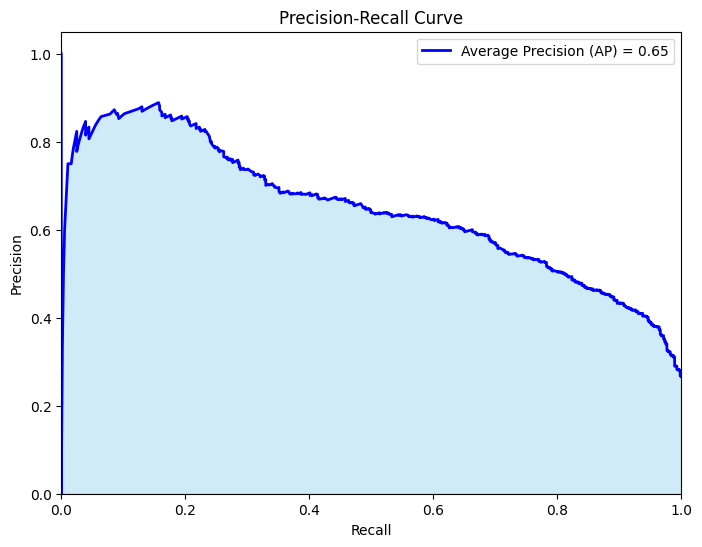

In [17]:
# Calculate the precision, recall, and average precision score

precision, recall, _ = precision_recall_curve(y_test, y_test_pred_proba)
avg_precision = average_precision_score(y_test, y_test_pred_proba)

# Plot the Precision-Recall Curve

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', lw=2, label=f'Average Precision (AP) = {avg_precision:.2f}')
plt.fill_between(recall, precision, alpha=0.4, color='skyblue')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.title('Precision-Recall Curve')
plt.legend(loc="upper right")
plt.show()